# **DIP Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

> ### _**Question 6**_

## Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import cv2

## Global Config

In [2]:
base_path = "../Images/{}"

In [3]:
threshold = 3

## Util Functions

In [4]:
def read_image(path, cvtcolor="RGB", cvtfloat=False):
    if cvtcolor == "RGB":
        if cvtfloat:
            return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2RGB).astype(np.float32)/255.0
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2RGB)
    elif cvtcolor == "GRAY":
        if cvtfloat:
            return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2GRAY).astype(np.float32)/255.0
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2GRAY)

def write_image(image, path):
    if not os.path.exists(path):
        os.mkdir(path)
    cv2.imwrite(path, image)

def show_image(image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

In [5]:
# From Q5

def find_range_index(ranges, x):
    for index, (start, end) in enumerate(ranges):
        if start <= x < end:
            return index
    return None

def piecewise(image,A,B):
    new_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            index = find_range_index(A,image[i,j])
            if index is not None:
                m,c = B[index]
                new_image[i,j] = m * image[i,j] + c
    
    return new_image

In [6]:
# From Q5

def plot_piecewise(image, new_image, A, B):
    fig, axs = plt.subplots(1, 3, figsize=(20, 10))

    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(new_image, cmap='gray')
    axs[1].set_title('Piecewise Linear Transformation')
    axs[1].axis('off')

    for i, ((x_start, x_end), (m, c)) in enumerate(zip(A, B)):
        x_vals = np.linspace(x_start, x_end, 1000)
        y_vals = m * x_vals + c

        axs[2].plot(x_vals, y_vals, color="red")
        axs[2].set_xlim(0, 1)
        axs[2].set_ylim(0, 1)
        axs[2].set_xlabel('Input Intensity')
        axs[2].set_ylabel('Output Intensity')
        axs[2].set_aspect('equal')

In [7]:
def piecewise_linear_mapping(image1, image2):
    assert image1.shape == image2.shape
    assert image1.dtype == image2.dtype == np.uint8

    flat_image1 = image1.flatten()
    flat_image2 = image2.flatten()

    flat_image1_list = flat_image1.tolist()
    flat_image2_list = flat_image2.tolist()

    prev_slope, prev_c = None, None
    A, B = [], []

    x_y_list = []

    for i in range(255):
        try:
            index = flat_image1_list.index(i)
            y = flat_image2_list[index]

            x_y_list.append((i, y))
        except:
            continue
    
    for i in range(len(x_y_list)-1):
        x1, y1 = x_y_list[i]
        x2, y2 = x_y_list[i+1]

        m = (y2-y1)/(x2-x1)
        c = y1 - m * x1

        if prev_slope is not None:
            predicted_y = prev_slope * x2 + prev_c
            if abs(predicted_y - y2) <= threshold:
                A[-1] = (A[-1][0]/255, x2/255)
                continue
        
        prev_slope, prev_c = m, c

        A.append((x1, x2))
        B.append((m, c/255))
    
    A[-1] = (A[-1][0], 1.0)

    return A,B
        

## Main Code

In [8]:
img_original = read_image('micro.jpg', cvtcolor = "GRAY", cvtfloat=True)
img_new = read_image('transformed.png', cvtcolor = "GRAY", cvtfloat=True)

img_original_int = read_image('micro.jpg', cvtcolor = "GRAY", cvtfloat=False)
img_new_int = read_image('transformed.png', cvtcolor = "GRAY", cvtfloat=False)

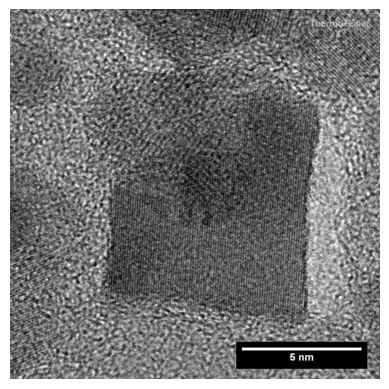

In [9]:
show_image(img_original, cmap='gray')

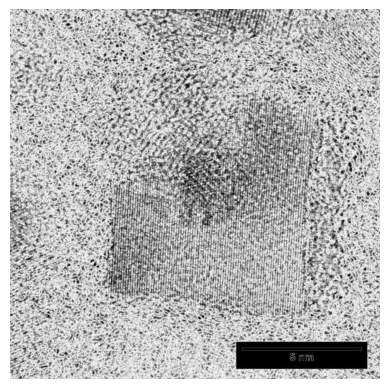

In [10]:
show_image(img_new, cmap='gray')

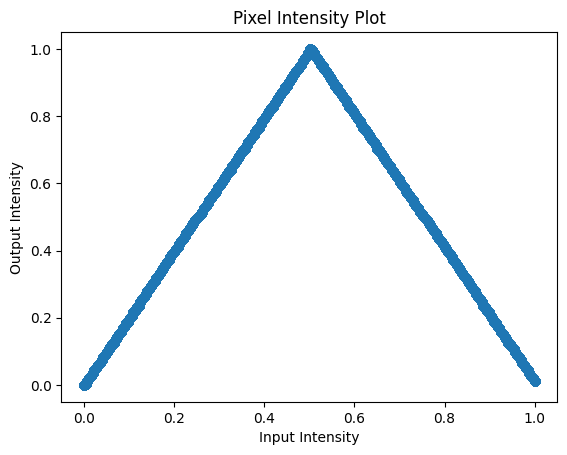

In [11]:
plt.plot(img_original.flatten(), img_new.flatten(), 'o')
plt.title('Pixel Intensity Plot')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.show()

In [12]:
A,B = piecewise_linear_mapping(img_original_int, img_new_int)
print(A,B)
print(len(A))

[(0.0, 0.01568627450980392), (1.5526644788158919e-298, 0.5058823529411764), (5.007342944181245e-297, 1.0)] [(1.0, 0.0), (2.0, -0.00392156862745098), (-2.0, 2.007843137254902)]
3


In [13]:
transformed_image = piecewise(img_original,A,B)

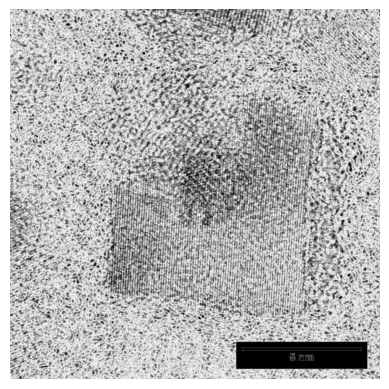

In [14]:
show_image(transformed_image, cmap='gray')

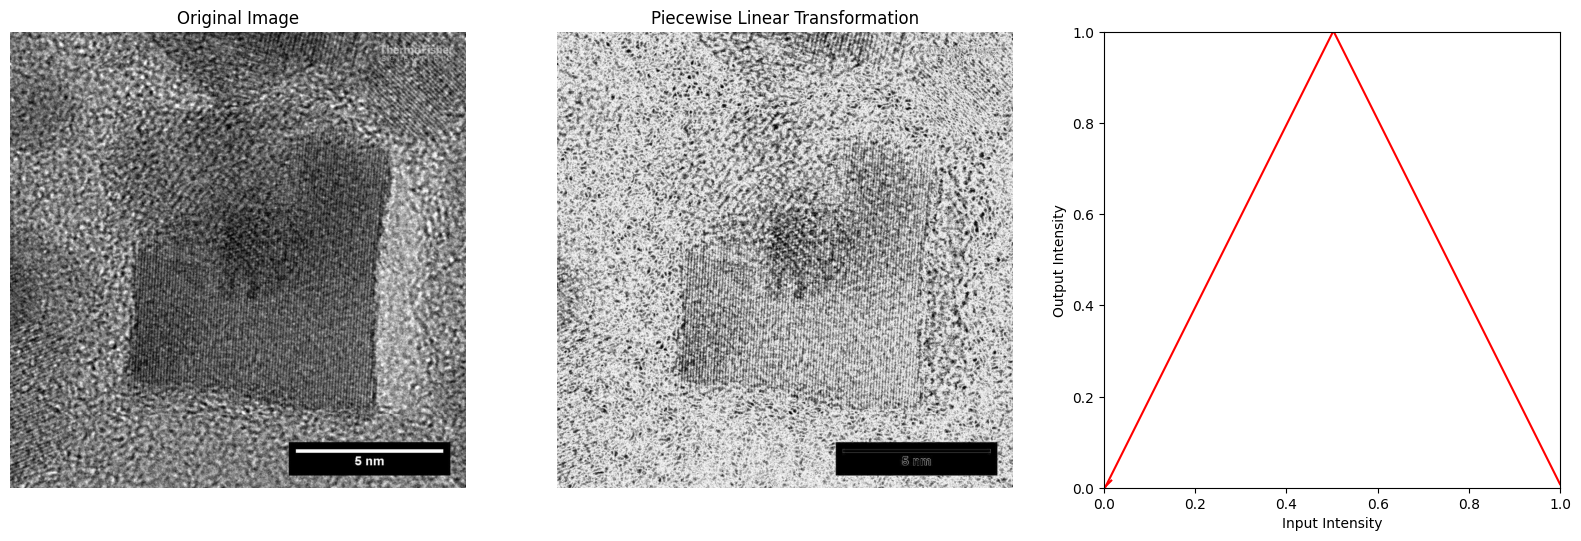

In [15]:
plot_piecewise(img_original, transformed_image, A, B)